# Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt


# Importing the Dataset

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"clsolive","key":"8baca448d5ab859edb1b759ec93ebc79"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download mattiuzc/stock-exchange-data




  0% 0.00/4.56M [00:00<?, ?B/s]
100% 4.56M/4.56M [00:00<00:00, 53.8MB/s]


In [ ]:
!unzip stock-exchange-data.zip -d stock_price

Archive:  stock-exchange-data.zip
  inflating: stock_price/indexData.csv  
  inflating: stock_price/indexInfo.csv  
  inflating: stock_price/indexProcessed.csv  


# Reading the Dataset

In [ ]:
df = pd.read_csv('stock_price/indexData.csv')

In [ ]:
df.shape

(112457, 8)

In [ ]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [ ]:
df.Index.unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


## Exploring the Data

In [ ]:
# Date from object to datetime

df.Date = pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


In [ ]:
df.head(3)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0


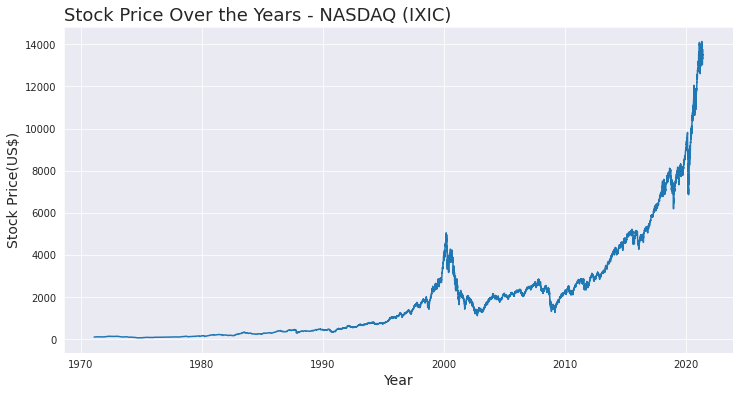

In [ ]:
sns.set_palette('tab10')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Date', y='Close', data = df.query('Index == "IXIC"'))
ax.figure.set_size_inches(12,6)
ax.set_title('Stock Price Over the Years - NASDAQ (IXIC)', loc='left', fontsize= 18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Stock Price(US$)', fontsize=14)
ax = ax

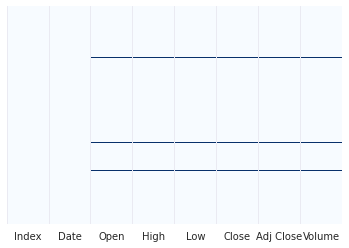

In [ ]:
# Checking for missing data

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

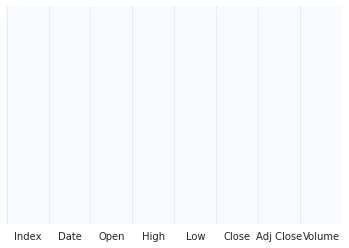

In [ ]:
df.fillna(method='ffill', inplace=True)  # ffill: propagate last valid observation forward to next valid backfill
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
df.shape

(112457, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa7263050>,
      dtype=object)

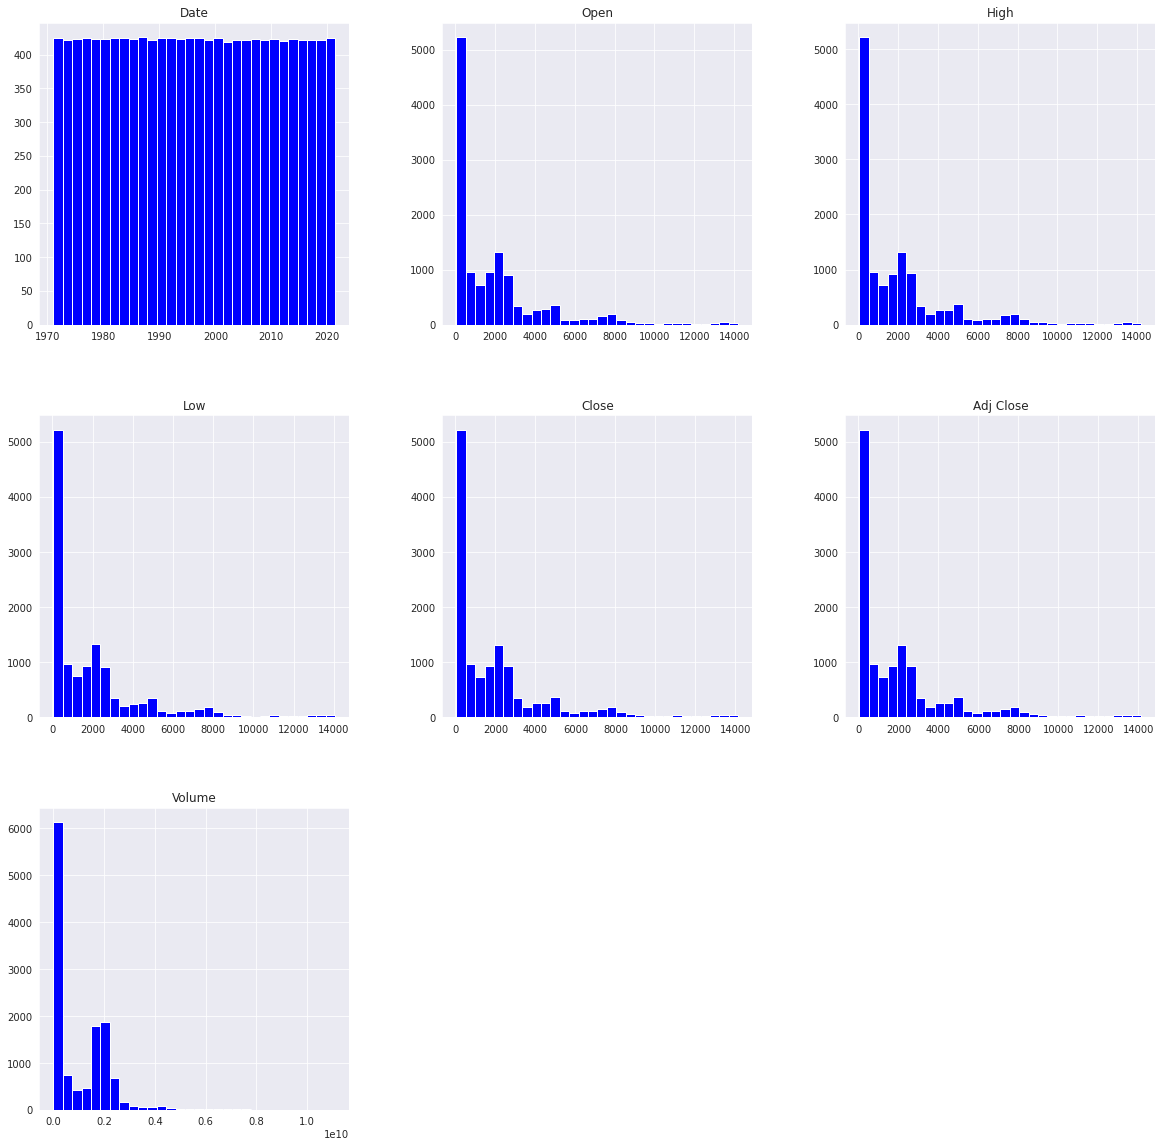

In [ ]:
df.query('Index =="IXIC"').hist(bins = 30, figsize = (20, 20), color = 'blue')

# Histograms for the IXIC index.


In [ ]:
df_nasdaq=df[df.Index=='IXIC']
df_nasdaq.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.0
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.0
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.0
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.0


In [ ]:
df_nasdaq = df_nasdaq[['Date', 'Close']]
df_nasdaq = df_nasdaq.reset_index(drop = True)

df_nasdaq.head()

,Date,Close
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997


# Preparing the model to predict the price of NASDAQ stock (IXIC)

### Comparison models used

**Last month value** and moving average

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
target = df['Close'].shift(-30) # target of last 30 measurements

X = np.array(df[['Close']])
X = preprocessing.scale(X) # Preprocessing for absolute values 0 to 1
X

array([[-0.7916099 ],
       [-0.79177432],
       [-0.79170433],
       ...,
       [-0.71159385],
       [-0.71052178],
       [-0.70996185]])

In [ ]:
 X = X[:-30] # X that will contain the training and testing
 X

array([[-0.7916099 ],
       [-0.79177432],
       [-0.79170433],
       ...,
       [-0.71332585],
       [-0.71590217],
       [-0.71456679]])

In [ ]:
X_temp = X[-30:]


In [ ]:
target.dropna(inplace=True)        #dropping na values
y = np.array(target)               # assigning y
y

array([ 538.309998,  537.780029,  535.450012, ..., 1248.930054,
       1258.579956, 1263.619995])

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)   #Train and test variables

# Treinando o modelo

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
score=model.score(X_test,y_test)#testing the linear regression model
score

0.9709202391916776

In [ ]:

y_pred = model.predict(X_test)
y_pred.shape

(22486,)

In [ ]:
y_test.shape

(22486,)

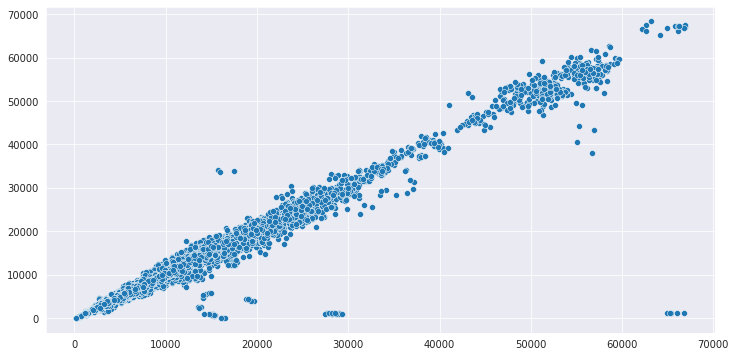

In [ ]:
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.figure.set_size_inches(12, 6)
ax